# Data Ingestion

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

df =pd.read_csv(r'FinalDatasetCsv.csv')

print(df.head())
print("Columns in the DataFrame:", df.columns)






      Acc X     Acc Y     Acc Z    gyro_x    gyro_y    gyro_z  label
0  0.046402 -0.137178 -0.282934 -0.036306 -0.008226 -0.023416      0
1 -0.136978  0.365242  0.108889  0.035776 -0.009448  0.009570      0
2 -0.045355 -0.103340 -0.534985 -0.011871 -0.027774  0.003462      0
3  0.242089  0.072761 -0.350396 -0.017980  0.002769 -0.005091      0
4 -0.230234  0.011765 -0.494085  0.011342  0.003380  0.006516      0
Columns in the DataFrame: Index(['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'label'], dtype='object')


# Exploratory Data Analysis (EDA) and Data Preprocessing

In [28]:

print(df.describe())



              Acc X         Acc Y         Acc Z        gyro_x        gyro_y  \
count  14249.000000  14249.000000  14249.000000  14249.000000  14249.000000   
mean      -0.001188      0.180173     -0.023520     -0.001316     -0.006517   
std        1.030887      0.837186      1.768632      0.141024      0.087841   
min       -8.805807     -8.476646    -17.320633     -2.062668     -0.571912   
25%       -0.379379     -0.126768     -0.701353     -0.046690     -0.033272   
50%       -0.013090      0.167153     -0.025562     -0.002219     -0.005783   
75%        0.362470      0.478696      0.674680      0.044939      0.021706   
max       10.488632     11.013258     19.725800      1.611687      0.599585   

             gyro_z         label  
count  14249.000000  14249.000000  
mean      -0.003200      0.592603  
std        0.068010      0.491367  
min       -0.666047      0.000000  
25%       -0.027224      0.000000  
50%       -0.002179      1.000000  
75%        0.024088      1.000000  


In [29]:
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)



Acc X     0
Acc Y     0
Acc Z     0
gyro_x    0
gyro_y    0
gyro_z    0
label     0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16020\1899211308.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


#  Visualize data distributions

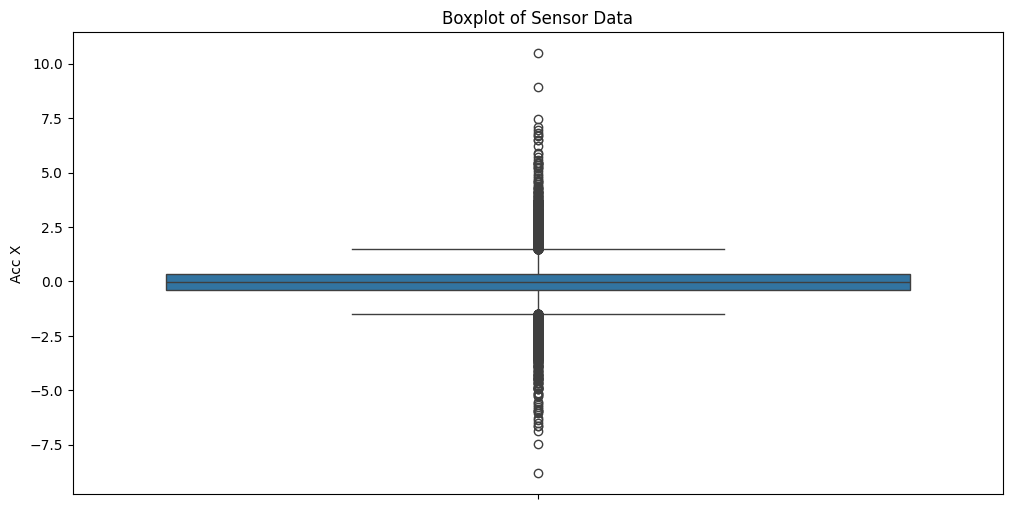

In [42]:
sensor_column = 'Acc X'
if sensor_column not in df.columns:
    raise KeyError(f"Column '{sensor_column}' not found in the DataFrame. Available columns: {df.columns}")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[sensor_column])
plt.title('Boxplot of Sensor Data')
plt.show()

# Plot relationships between variables

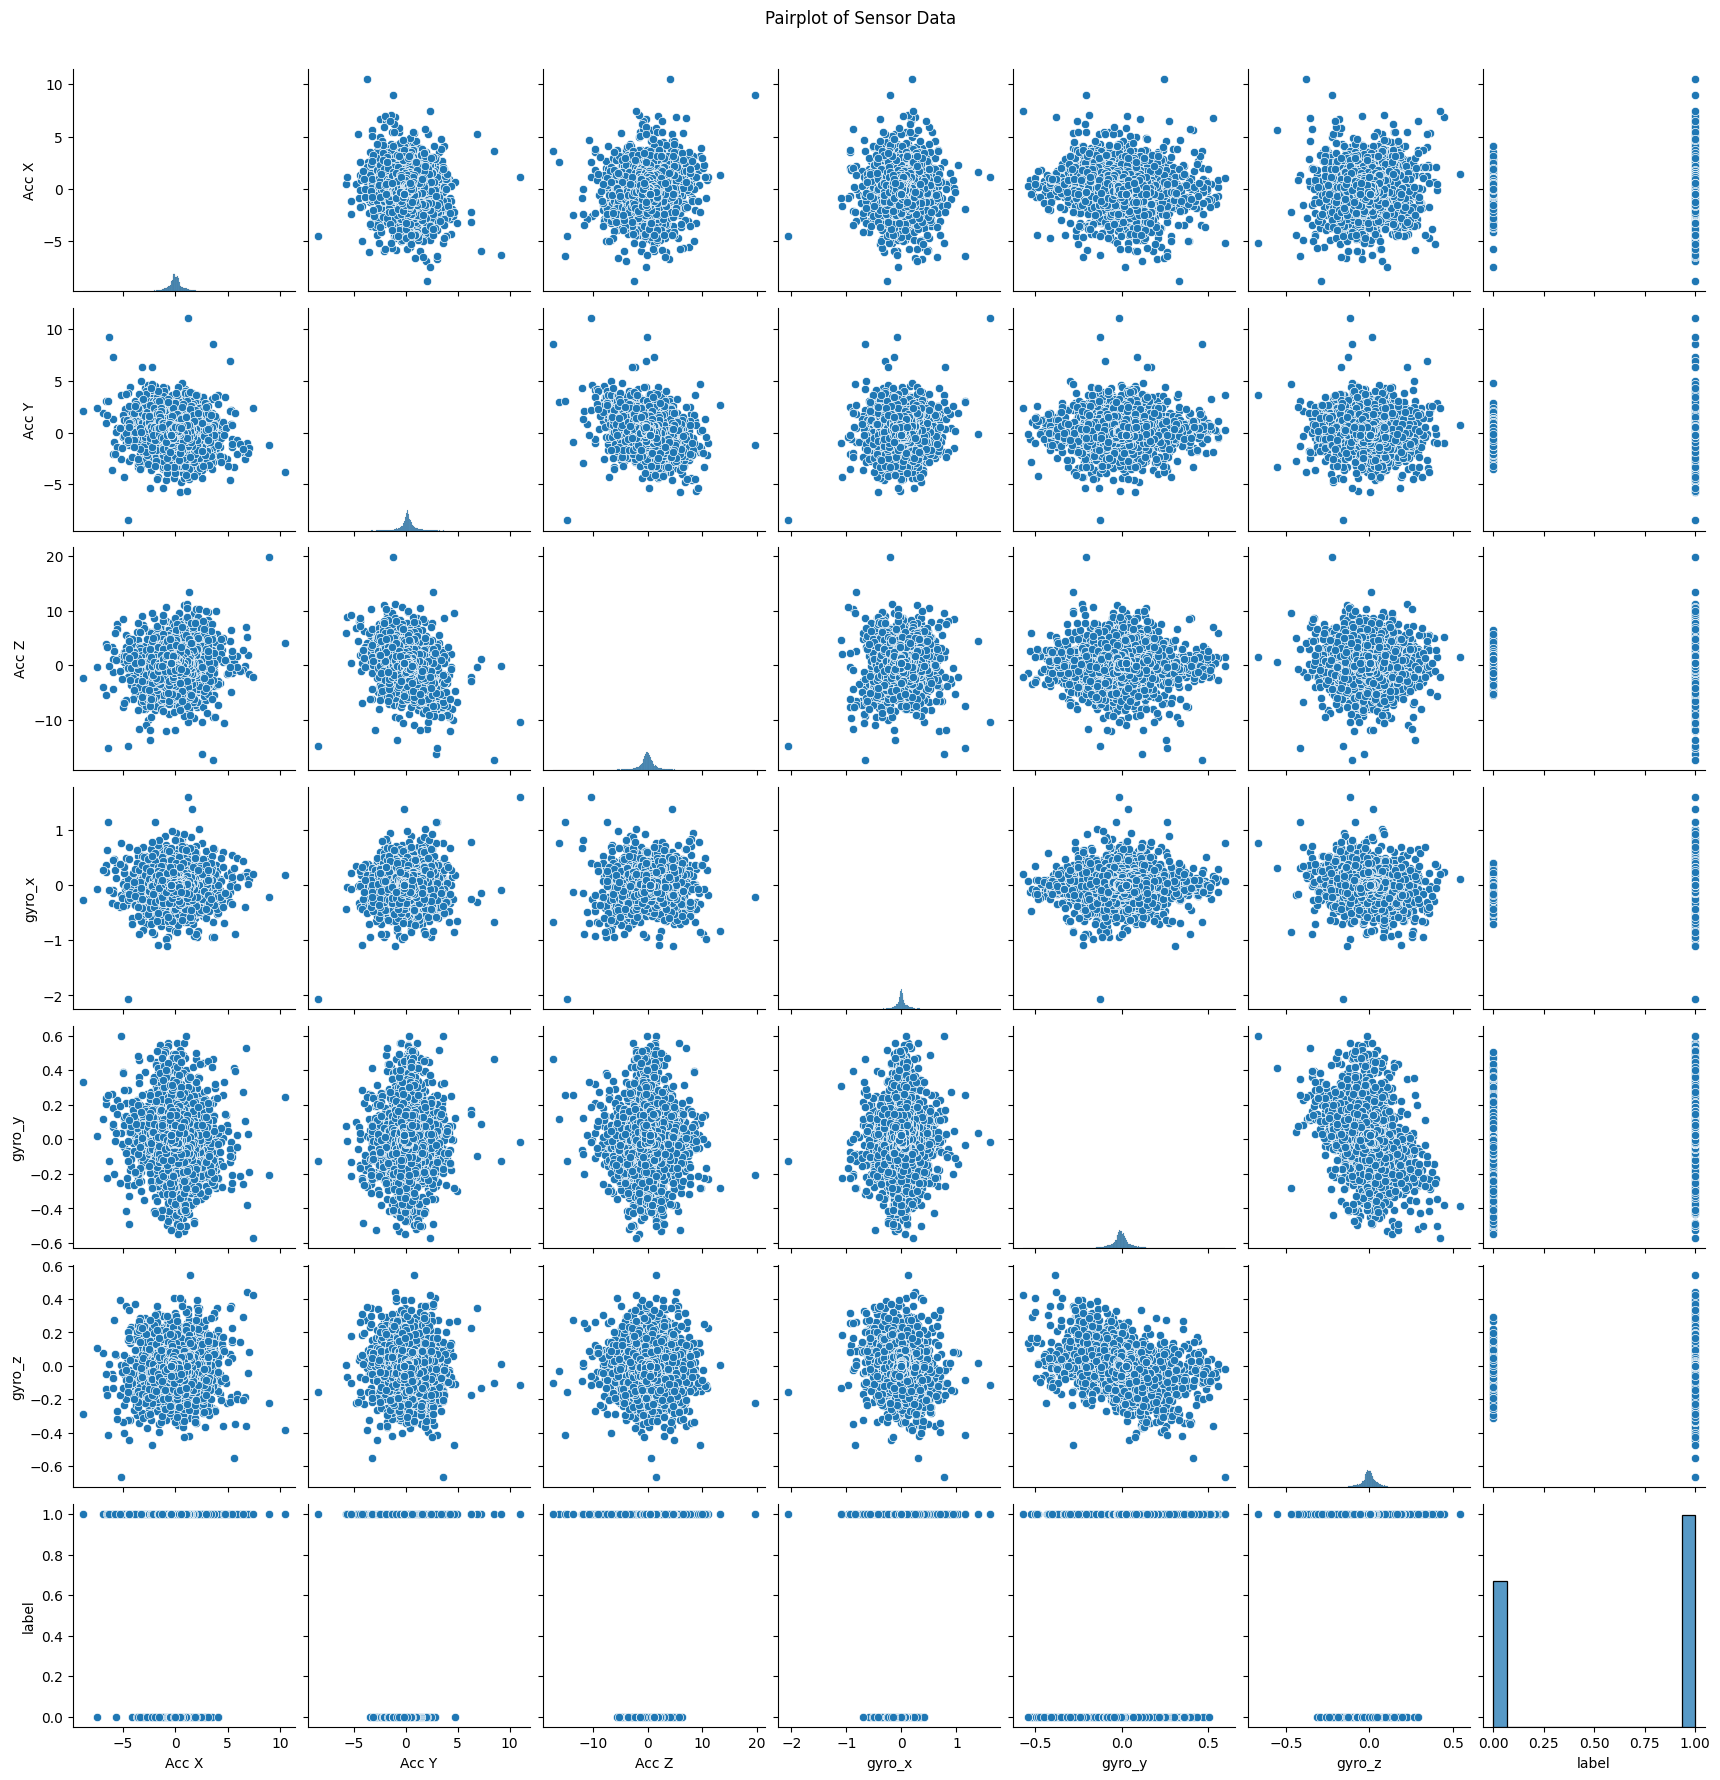

In [ ]:

sns.pairplot(df)
plt.suptitle('Pairplot of Sensor Data', y=1.02)
plt.show()

#  Preliminary Statistical Models

In [ ]:


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(outliers_iqr.sum())

Acc X     1669
Acc Y     1633
Acc Z     1333
gyro_x    1804
gyro_y    1823
gyro_z    1482
label        0
dtype: int64


# Z-Score Method


In [ ]:


df_z = df.apply(zscore)


outliers_
print(outliers_z.sum())

743


#  Machine Learning Techniques for Anomaly Detection

# Isolation Forest

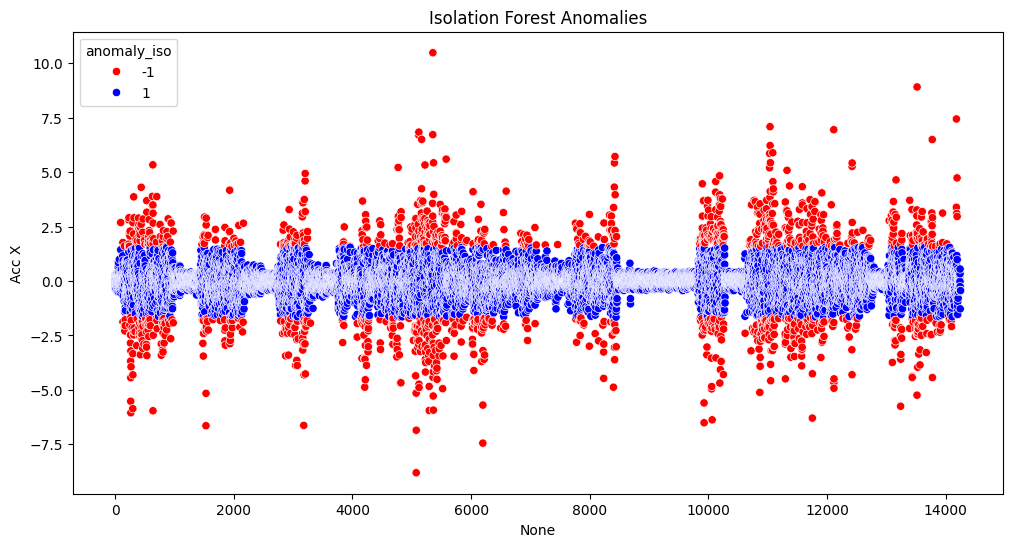

In [43]:



iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_iso'] = iso_forest.fit_predict(df[[sensor_column]])


plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=sensor_column, hue='anomaly_iso', palette={-1: 'red', 1: 'blue'}, data=df)
plt.title('Isolation Forest Anomalies')
plt.show()

# Local Outlier Factor (LOF)

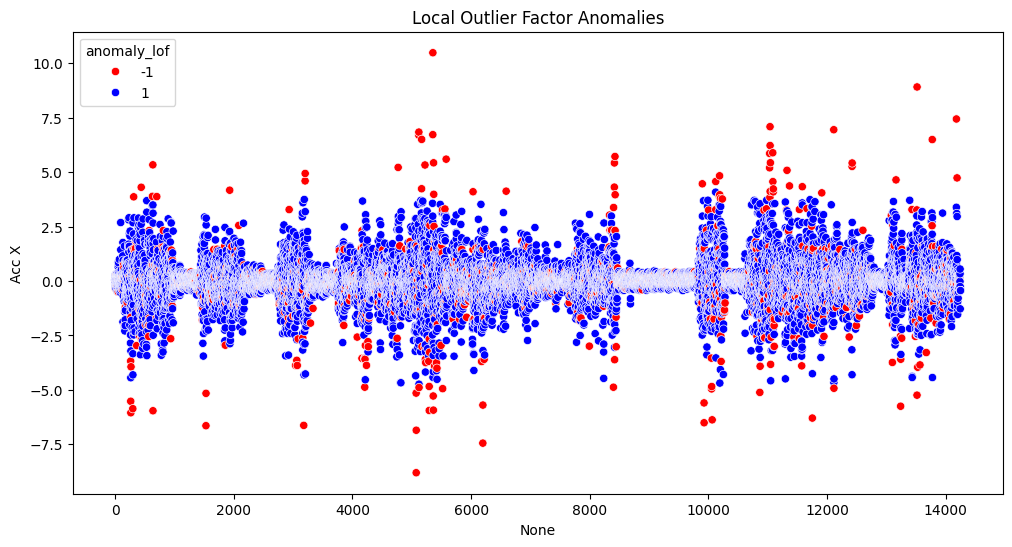

In [44]:

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['anomaly_lof'] = lof.fit_predict(df[[sensor_column]])

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=sensor_column, hue='anomaly_lof', palette={-1: 'red', 1: 'blue'}, data=df)
plt.title('Local Outlier Factor Anomalies')
plt.show()

# Validation of Anomaly Detection

In [45]:

np.random.seed(42)
y_true = np.random.choice([0, 1], size=len(df))


print("Isolation Forest Classification Report")
print(classification_report(y_true, df['anomaly_iso']))

print("Local Outlier Factor Classification Report")
print(classification_report(y_true, df['anomaly_lof']))

Isolation Forest Classification Report


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7121
           1       0.50      0.90      0.64      7128

    accuracy                           0.45     14249
   macro avg       0.17      0.30      0.21     14249
weighted avg       0.25      0.45      0.32     14249

Local Outlier Factor Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7121
           1       0.50      0.90      0.64      7128

    accuracy                           0.45     14249
   macro avg       0.17      0.30      0.21     14249
weighted avg       0.25      0.45      0.32     14249



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{